In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
341,35,75000,0
349,38,61000,0
89,35,50000,0
92,26,15000,0
337,35,79000,0


# Train test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [7]:
X_train.shape ,X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [12]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

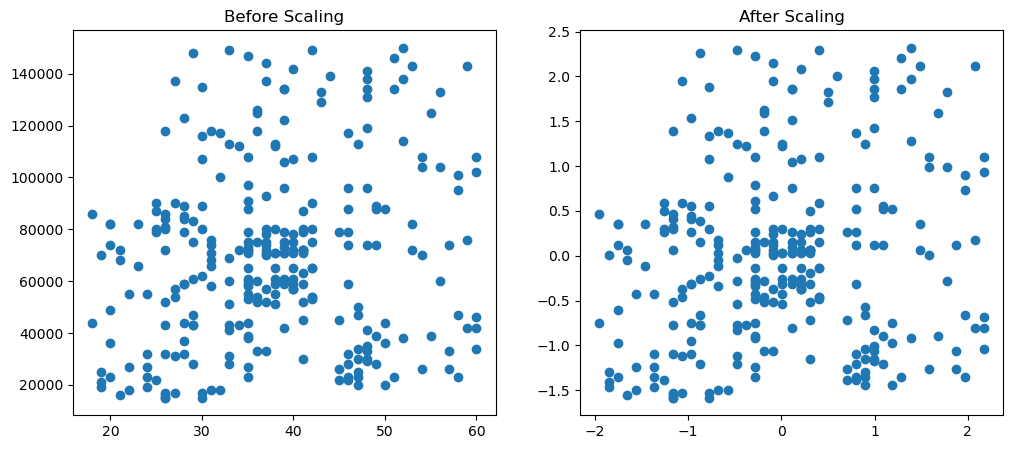

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()

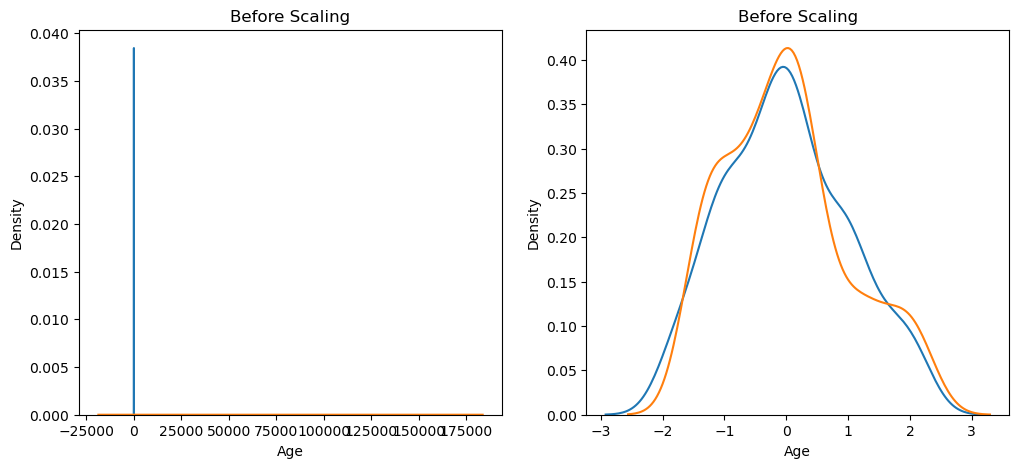

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("Before Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

# comparison of distributions

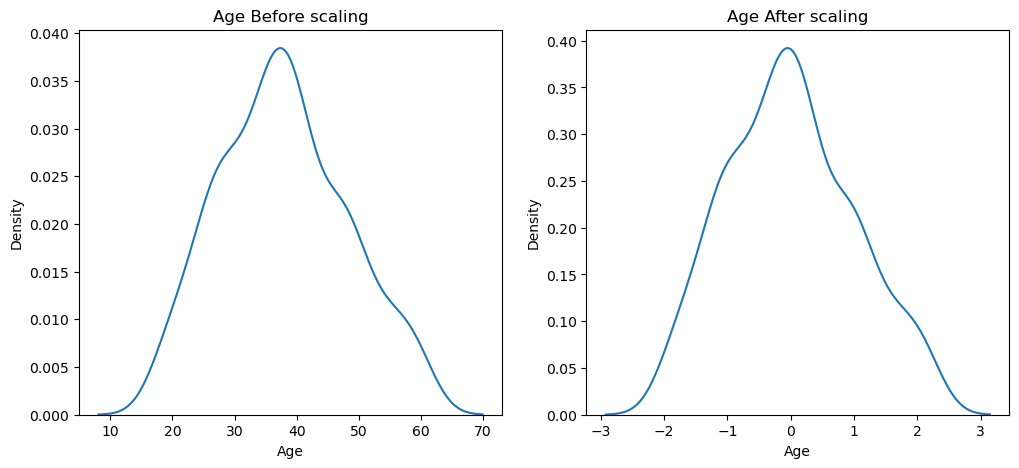

In [17]:
fig ,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scalling
ax1.set_title("Age Before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title("Age After scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

plt.show()

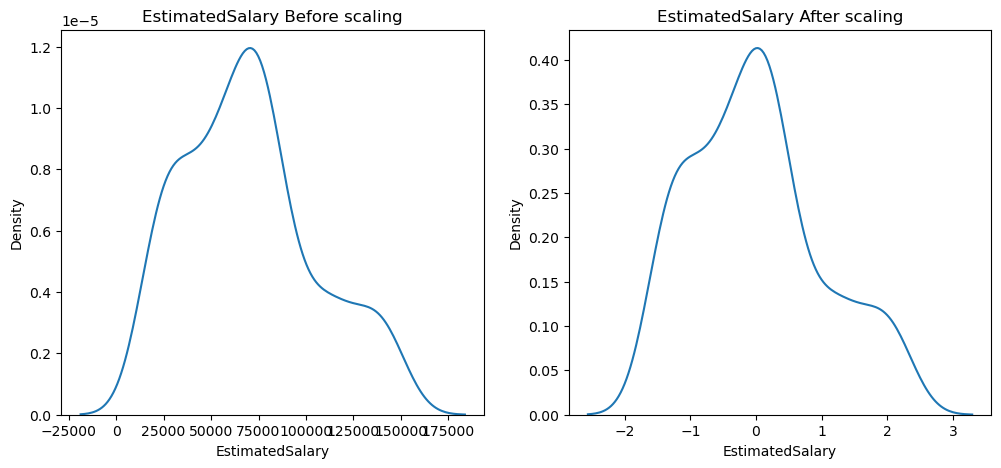

In [18]:
fig ,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scalling
ax1.set_title("EstimatedSalary Before scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("EstimatedSalary After scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

# Why scaling is importent ?

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_scaled =  LogisticRegression()

In [21]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print("Model with unscaled value : ",accuracy_score(y_test,y_pred))
print("Model with Scaled Value : ",accuracy_score(y_test,y_pred_scaled))

Model with unscaled value :  0.875
Model with Scaled Value :  0.8666666666666667


## For Decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [27]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [28]:
dt_y_pred = dt.predict(X_test)
dt_y_pred_scaled = dt.predict(X_test_scaled)

In [29]:
print("Model with unscaled value : ",accuracy_score(y_test,dt_y_pred))
print("Model with Scaled Value : ",accuracy_score(y_test,dt_y_pred_scaled))

Model with unscaled value :  0.875
Model with Scaled Value :  0.6583333333333333
